# Introduction

As recent survey taken by the Portuguese bank  on their revenue has given them an financially shaking results which id declining the growth of their sector in banking , with investigation , thy have  found out that roost cause of this issue is their clients are not doing frequent deposits as they were doing earlier , as we know these BFSI sectors usually use clients investments as like deposit allows them to have a hold on it over certain period which helps them to invest on higher gain finance sector to earn profit on it , move over this make the clients to invest in insurance , funds depending on their deposit to increase the revenue of the bank , so the ultimate goal of the Portuguese bank is to analyse on the customer who have higher chance of subscribing for their term deposit by and focussing on marketing efforts to wards them 

# Initial Data Set Understanding and Information 

The data set consists of 41188 customer records and 21 inputs feature  including the target variable

Bank Customer data:

•Age (numeric)

•Job: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
•Marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
•Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
•Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
•Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
•Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

Information on Contact trial of the current campaign with Customers:

•Contact: contact communication type (categorical: 'cellular','telephone')

•Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

•Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

•Duration: last contact duration, in seconds (numeric). 
Important note: This characteristic has a significant impact on the output target, for example, if duration=0, y='no'. However, the length is unknown prior to making a call. Immediately upon the call's conclusion, y is evidently known. Thus, if the goal is to build a realistic predictive model, this input should only be used for benchmarking purposes and should be removed..

•Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

•Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

•Previous: number of contacts performed before this campaign and for this client (numeric)

•Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    

Social and economic info on Customer

•Emp.var.rate: employment variation rate - quarterly indicator (numeric)
•Cons.price.idx: consumer price index - monthly indicator (numeric)
•Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
•Euribor3m: euribor 3 month rate - daily indicator (numeric)
•Nr.employed: number of employees - quarterly indicator (numeric)

Target Variable:
•Subscribed - has the client subscribed a term deposit? (binary: 'yes', 'no')

Source:
•Dataset from : https://www.kaggle.com/datasets/bank-marketing

In [1]:
#Importing all libraries required for Computation
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, 
    plot_roc_curve, 
    precision_recall_curve,
    plot_precision_recall_curve,
    average_precision_score,
    auc)

# for feature engineering
#!pip install feature_engine
#!pip install imblearn
from feature_engine import encoding as ce
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from imblearn.ensemble import EasyEnsembleClassifier

In [2]:
# To run the code on google colab , file uplaod from local device 
from google.colab import files
uploaded = files.upload()

Saving bank_marketing_dataset.csv to bank_marketing_dataset (4).csv


In [3]:
# read the data from local drive in to google colab
import io
bdf = pd.read_csv(io.BytesIO(uploaded['bank_marketing_dataset.csv']))

In [4]:
# normal pandas read function if you are runid in normal pc and reading the local file for data 
#bdf = pd.read_csv("D:/AI & ML MA336-7-SU/Classfic_data/bank_marketing_dataset.csv")

In [5]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
bdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bdf.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Number of Row and Columns in our data set 

In [8]:
bdf.shape

(41188, 21)

Here below Checking for Missing or Na values in data set 

In [9]:
bdf.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

Here lets go throught he data set and observe how many categorical and numrical variables are present in tha data set so it can used for fur the data preprocessing

In [10]:
# categorical variables
cat_varb = [varb for varb in bdf.columns if varb != 'y' and bdf[varb].dtype=='O']

# numerical variables
num_varb = [varb for varb in bdf.columns if varb != 'y' and varb not in cat_varb]

print('There are {} categorical variables'.format(len(cat_varb)))
print('There are {} numerical variables'.format(len(num_varb)))

There are 11 categorical variables
There are 10 numerical variables


So in those all the categorical variables  we must know how many number of categories are present in the each categorical attributes

In [11]:
bdf["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [12]:
bdf["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [13]:
bdf["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [14]:
bdf["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [15]:
bdf["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [16]:
bdf["contact"].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [17]:
bdf["month"].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [18]:
bdf["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [19]:
#We will use a binary target for computation friendly instead of categorical
bdf['y_binary'] = bdf['subscribed'].map({'no':0, 'yes':1}).astype(int)

# Explotary Data analysis of Numerical variables

In [20]:
def plot_num_features(bdf, variable):
    """ Box plot and Histogram functions for visualize continuous variables"""
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1,3,1)
    bdf[variable].hist(bins=30)
    plt.title('Histogram')
    plt.xlabel(variable)
    
    plt.subplot(1,3,2)
    sns.distplot(bdf[variable])
    plt.title('Dist plot')
    plt.xlabel(variable)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=bdf[variable])
    plt.title('Boxplot')
    plt.xlabel(variable)
    
    plt.show()

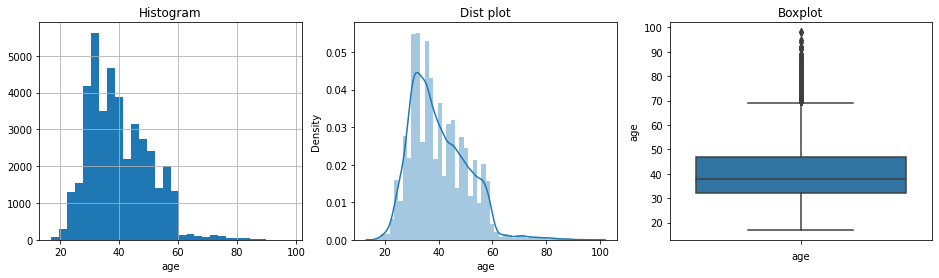

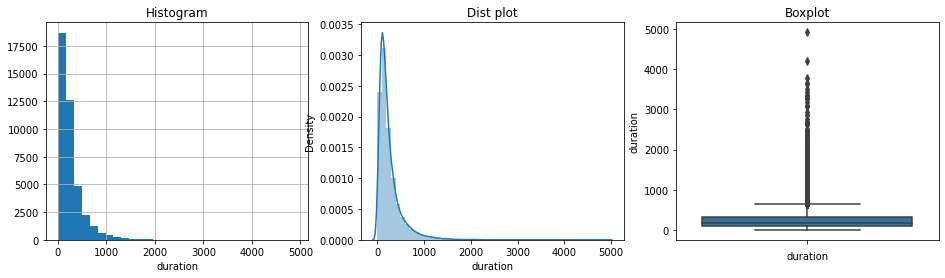

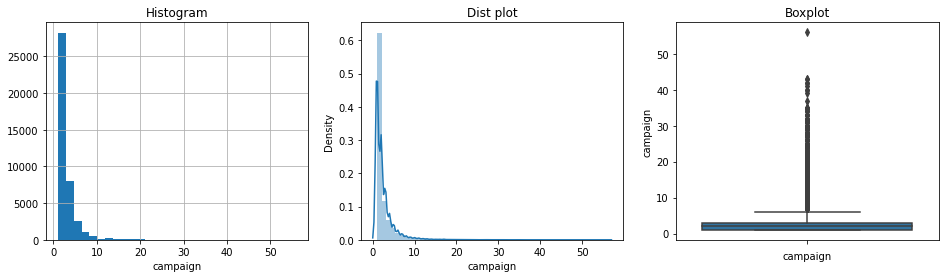

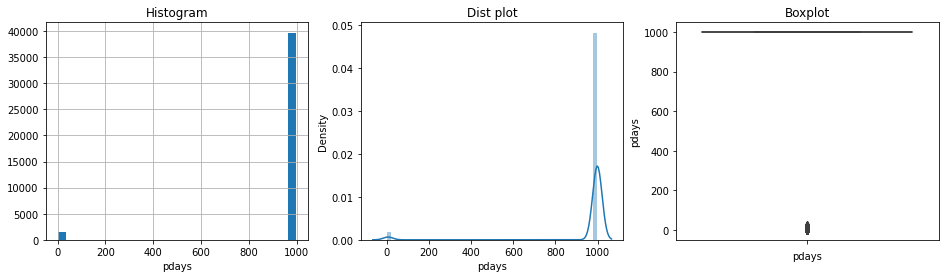

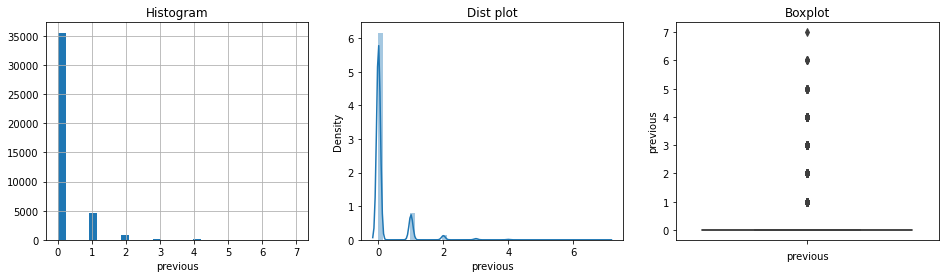

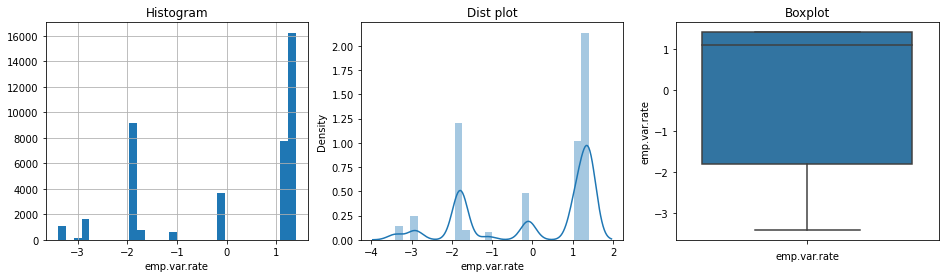

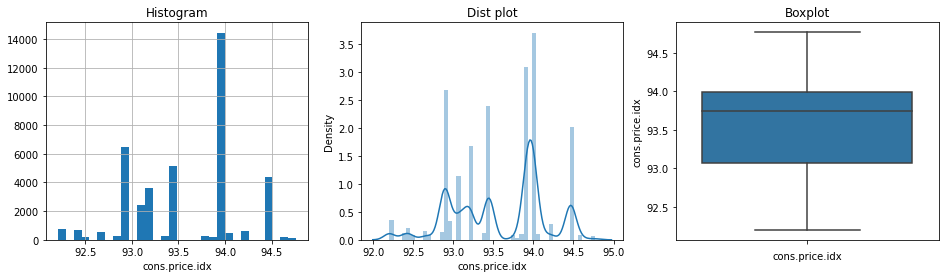

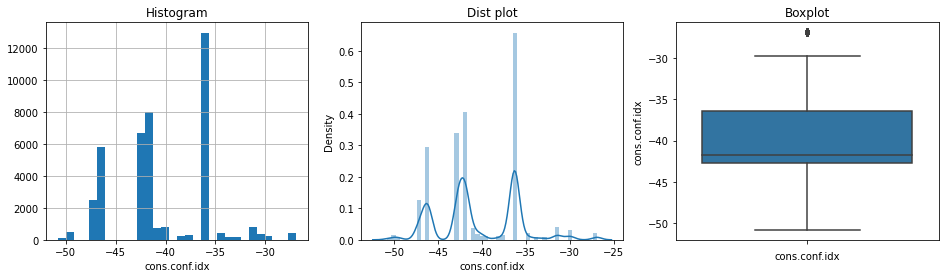

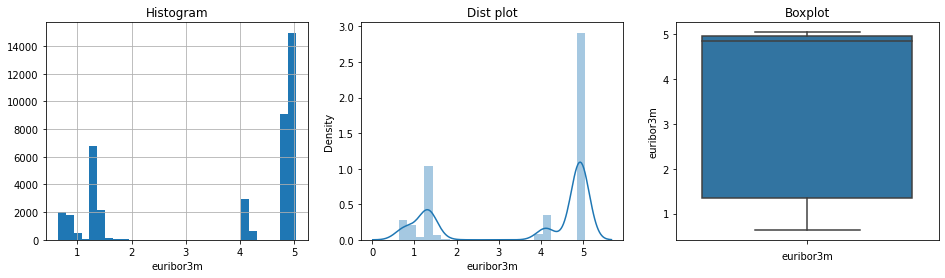

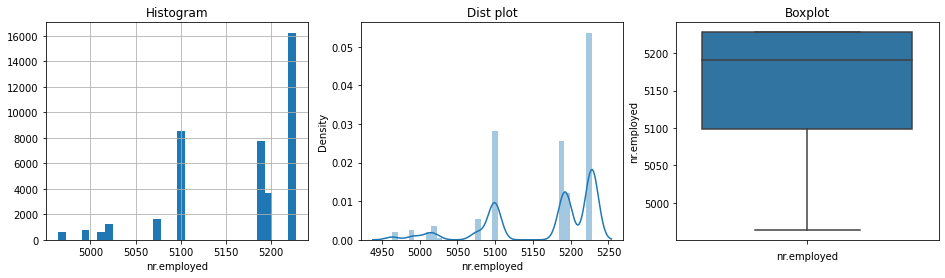

In [21]:
s = [plot_num_features(bdf,i) for i in bdf[num_varb]]

So starting with age column int th data we have age in different ranges for thr ease of analysis , we need to bin them in to categories 

Lets take the look at the their distrubution of data becausee which can help us understand which age range customers are investion highly depositing 

so that makerting can be targetted over the certain age bracket customer to make the invest on term deposit

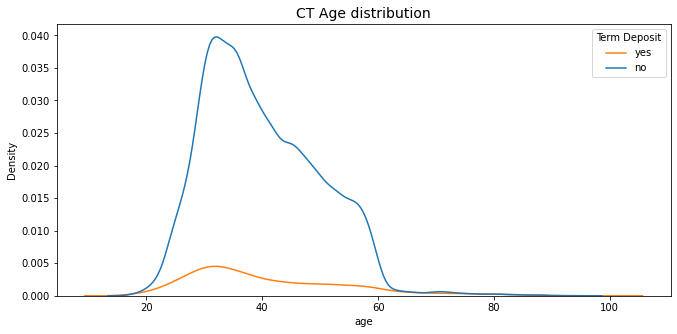

In [22]:
plt.figure(figsize=(11,5))
sns.kdeplot(data=bdf, x='age', hue='subscribed')
plt.title('CT Age distribution', fontsize=14)
plt.legend(title='Term Deposit', labels=['yes', 'no']);

In [23]:
# let's divide age into the bins as bagged category
nu_bins = [17, 30, 40, 50, 60, 100]
# bins labels
b_labels = ['17-30', '31-40', '41-50', '51-60', '>60']
# Bucketed
bdf['age_grp'] = pd.cut(bdf['age'], bins=nu_bins, labels=b_labels, include_lowest=True)

In [24]:
bdf.age_grp.value_counts() # here is our binned age groupcategory of the customers

31-40    16385
41-50    10240
17-30     7383
51-60     6270
>60        910
Name: age_grp, dtype: int64

In [25]:
# dropping age column , because we have binned categorical colum which make ease of analysis
bdf.drop(['age'], axis=1, inplace=True)

# E D A on  Categorical Attributes to Drive Insights 

Since the data is a classificated based data , we need make sure that data has been balaced , traing the model with biased data will lead to bias in prediction , hence lets check the class imbalece of the data and recitfy before the data used for training the model 

In [26]:
bdf["subscribed"].count()

41188

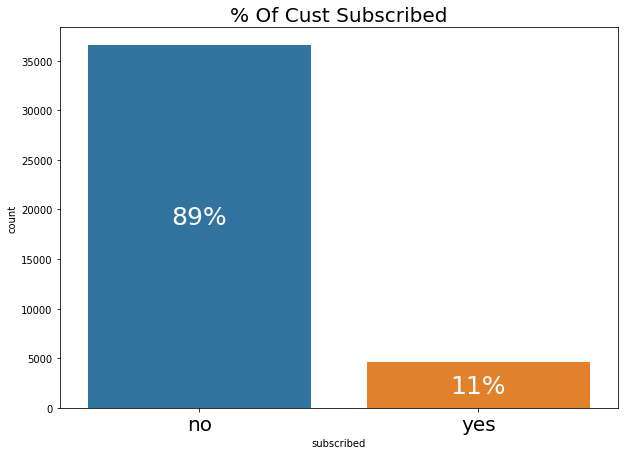

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(x="subscribed", data=bdf)
percentage_y = bdf['subscribed'].agg('value_counts', normalize=True) * 100
plt.title("% Of Cust Subscribed",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.text(0, 18000, "{:.2g}%".format(percentage_y[0]),  ha='center', va='bottom', size=25, color='w')
plt.text(1, 1000, "{:.2g}%".format(percentage_y[1]),  ha='center', va='bottom', size=25, color='w')
plt.show()

In [28]:
(bdf['subscribed'].value_counts())/len(bdf)

no     0.887346
yes    0.112654
Name: subscribed, dtype: float64

As we can interpret staticitically from the above data chart it is 88.7% of Non SUbscribers,describes that our subscription for term deposit  is not made by many of the customers ,but we can also interpet the the we have data which has large number No of Non subscribers and less number of subscribers, model trained withs such kind if data will give biased predicitions

This Below plot on job wise distribution give us an idea about customer in which state of job are highly depositing on bank 

Text(0.5, 1.0, 'Distribution of Subscribers Job Wise')

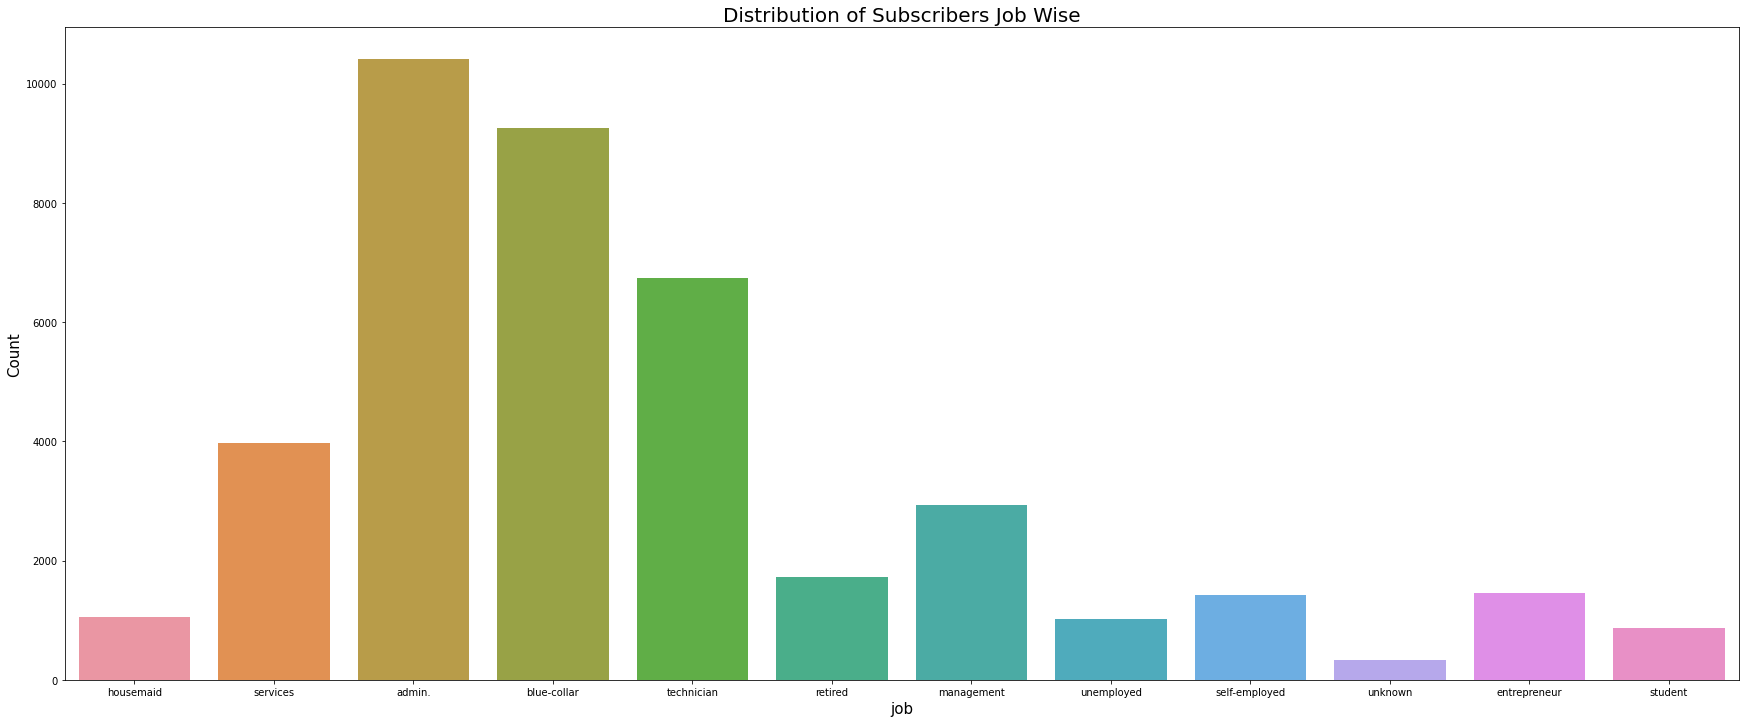

In [29]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'job',data = bdf)
plt.xlabel("job", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Subscribers Job Wise', fontsize=20)

Below plot helps in observing Customers depositing based on the maritial status which helps in targeted marketing on certain customers

Text(0.5, 1.0, 'Marital Distribution')

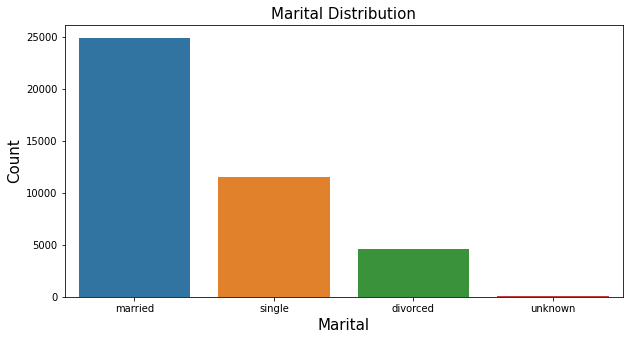

In [30]:
#Marital
plt.figure(figsize = (10,5))
sns.countplot(x = 'marital',data = bdf)
plt.xlabel("Marital", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Marital Distribution', fontsize=15)

This Below plot helps in observing Customers depositing based on the educational background which helps banks to make aware over students to make them deposit 

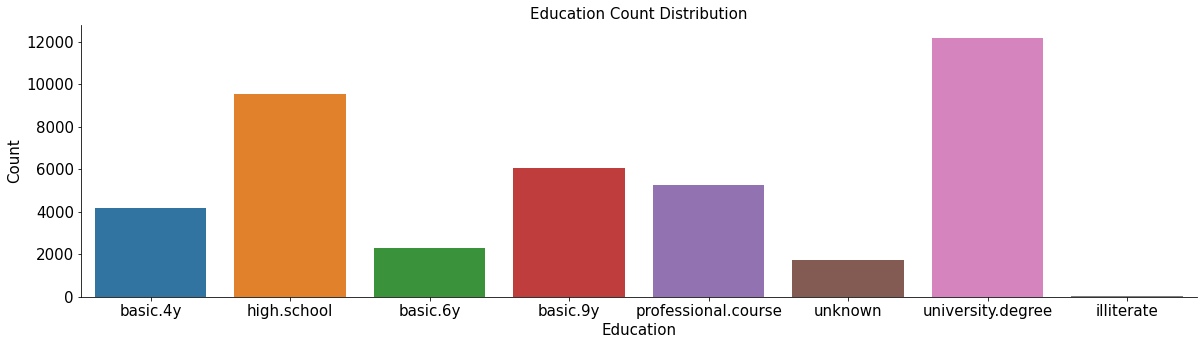

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bdf)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

This loan related plot hels the bank to under the level of customer based on the loan dept, whether to target them in the marketing or not!

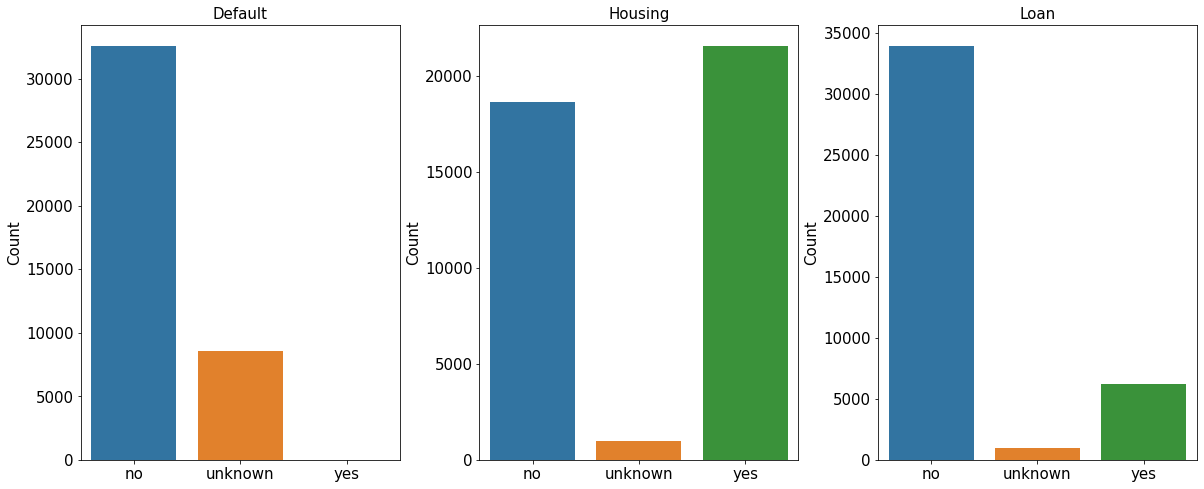

In [32]:
# Default, customer whos has credit in default 
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bdf, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, customer whos has housing loan with bank 
sns.countplot(x = 'housing', data = bdf, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, customer whos has personal loan with bank 
sns.countplot(x = 'loan', data = bdf, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

# Data Manupulation & Pre-Processing

As it was advised in the data set duration is affecting the prediction of target when the duration is "0" then the Y is also "0", which will manupulate prediction a lot hence dropping it 

In [33]:
# dropping duration column
bdf.drop(['duration'], axis=1, inplace=True)

In [34]:
bdf.shape

(41188, 21)

Removing Outlier from the Campaign feature 
From the box plot shown above, we can see that there is only one number greater than 50. We shall therefore reduce the value.

In [35]:
len(bdf[bdf['campaign']>50])

1

In [36]:
bdf.drop(bdf[bdf['campaign'] > 50].index, inplace = True)

In [37]:
bdf.shape

(41187, 21)

pdays  = Previous no of daya passed till the customer was contacted

This feature details how many days have gone since the client was last contacted as part of an earlier campaign (numeric; 999 means client was not previously contacted)

In order to explain in weeks whether a client was contacted or not, we will convert pdays into the categorical features 1w (less than 7days), 2w (less than 14days), and >2w (more than 14days)

In [38]:
# Processing of converitng the pdays feature to categorical by binng them in to categories
# Let's divide pdays into 3 groups like contacte less than 7 days ago , less than 14 days ago and more than 14 days ago , and not contacted 4 four categories 
bucket = [0, 7, 14, 30,999]
label = ['<7days', '<14days', '>14days','Not Contacted']
bdf['pdays_group'] = pd.cut(bdf['pdays'], bins=bucket, labels=label, include_lowest=False)

In [39]:
bdf[(bdf['pdays'] >15) & (bdf['pdays'] != 999) ].head(10)

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,y_binary,age_grp,pdays_group
37890,entrepreneur,married,basic.6y,no,yes,no,cellular,sep,tue,2,16,1,success,-3.4,92.379,-29.8,0.819,5017.5,yes,1,31-40,>14days
37907,entrepreneur,married,basic.6y,no,no,no,cellular,sep,tue,4,16,2,failure,-3.4,92.379,-29.8,0.819,5017.5,no,0,31-40,>14days
39135,retired,married,professional.course,no,no,yes,cellular,mar,tue,1,21,2,failure,-1.8,93.369,-34.8,0.655,5008.7,yes,1,>60,>14days
39187,technician,single,high.school,no,no,no,cellular,mar,fri,3,17,3,failure,-1.8,93.369,-34.8,0.653,5008.7,no,0,31-40,>14days
39549,technician,married,professional.course,no,no,no,cellular,apr,thu,1,18,1,success,-1.8,93.749,-34.6,0.659,5008.7,yes,1,31-40,>14days
39712,management,married,unknown,no,yes,no,cellular,may,fri,1,18,2,failure,-1.8,93.876,-40.0,0.695,5008.7,yes,1,41-50,>14days
39883,management,single,university.degree,no,yes,no,cellular,jun,thu,1,22,1,success,-1.7,94.055,-39.8,0.729,4991.6,yes,1,17-30,>14days
40100,technician,married,unknown,no,yes,no,cellular,jul,mon,1,16,1,success,-1.7,94.215,-40.3,0.827,4991.6,no,0,>60,>14days
40210,student,single,unknown,no,no,no,cellular,jul,tue,2,16,1,success,-1.7,94.215,-40.3,0.876,4991.6,yes,1,17-30,>14days
40234,admin.,married,basic.9y,no,no,no,cellular,jul,thu,2,25,2,failure,-1.7,94.215,-40.3,0.884,4991.6,yes,1,51-60,>14days


In [40]:
bdf['pdays_group'].isnull().sum()

15

In [41]:
# Replacing NaN valuea of pdays to "Not contacted".
bdf['pdays_group'].fillna('Not Contacted', inplace=True)

In [42]:
#Checking the categories values count in binner attribute
bdf.pdays_group.value_counts()

Not Contacted    39687
<7days            1162
<14days            276
>14days             62
Name: pdays_group, dtype: int64

In [43]:
#  drop pdays actual attribute from data set because we are going to use the categorocal one 
bdf.drop('pdays', axis=1, inplace=True)

In [44]:
# removing age & pdays from num_varb data frame 
num_varb.remove('age')
num_varb.remove('pdays')

In [45]:
num_varb.remove('duration')

In [46]:
# adding the age_group & pdays_group categorical values created in to cat_varb data frame
cat_varb.append('age_group')
cat_varb.append('pdays_group')

In [47]:
bdf.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'subscribed', 'y_binary', 'age_grp', 'pdays_group'],
      dtype='object')

Correlation matric to understand the relationship betwen data set that affects the prediction computation

<Figure size 1440x360 with 0 Axes>

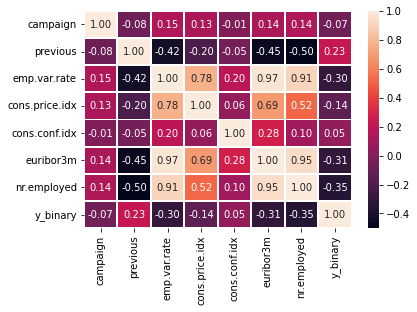

In [48]:
plt.figure(figsize=(20,5))
#sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidths=.7)
plt.show()
sns.heatmap(bdf.corr(),annot=True,fmt=".2f",linewidths=.8)
plt.show()

The correlation between nr.employed, euribor3m, and emp.var.rate is evident from the data above. We shall use all the columns because multi-collinearity has no effect on categorization predictive modelling.

In [49]:
# Dropping the subscribed column from orginal data because we can converted it in to binary values to get the ease of model calculation
bdf.drop('subscribed', axis=1, inplace=True)

In [50]:
#Checking the number categorical and Numerical values present after pre processing
cat_varb = [var for var in bdf.columns if bdf[var].dtype == 'O' and var != 'y']
num_varb = [var for var in bdf.columns if bdf[var].dtype != 'O' and var != 'y']

print('The no of categorical variables: {}'.format(len(cat_varb)))
print('The no of numerical variables: {}'.format(len(num_varb)))

The no of categorical variables: 10
The no of numerical variables: 10


In [51]:
# Distinguishing the categorical attributes based on number of categories with them like less and more 
cat_less = [cat for cat in cat_varb if bdf[cat].nunique() < 4]
cat_more = [cat for cat in cat_varb if cat not in cat_less]

print('Few categories',cat_less)
print('Many categories', cat_more)

Few categories ['default', 'housing', 'loan', 'contact', 'poutcome']
Many categories ['job', 'marital', 'education', 'month', 'day_of_week']


In [52]:
#Appending both categorical values in cat_more data frame
cat_more.append("age_group")
cat_more.append("pdays_group")

In [53]:
# Checking the categorical value in that cat_more attribute 
cat_more

['job',
 'marital',
 'education',
 'month',
 'day_of_week',
 'age_group',
 'pdays_group']

lets binary encoding above categorical variables that are having 3 unique values

Default - Will assign Yes,unknown to 1 and no to 0
Housing - will assign Yes to 1 and no,unknown to 0
loan - We will assign Yes to 1 and unknown,No to 0
contact - Binary encoding
poutcome - Success assigned to 1,rest No and Unknown to 0

In [54]:
bdf.default = bdf.default.map({'no': 1, 'unknown': 0, 'yes': 0}).astype('uint8')
bdf.housing = bdf.housing.map({'no': 0, 'unknown': 0, 'yes': 1}).astype('uint8')
bdf.loan = bdf.loan.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
bdf.contact = bdf.contact.map({'cellular': 1, 'telephone': 0}).astype('uint8')
bdf.poutcome = bdf.poutcome.map({'nonexistent':0, 'failure':0, 'success':1}).astype('uint8')

# Data Test & Train Split

In [55]:
X=bdf.drop(columns='y_binary')
y=bdf['y_binary']

In [56]:
# Training,test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # 80% training and 20% test

Observing that the categories have numerous properties, one hot encoding would be a poor choice. The curse of dimensionality will be created by one-hot encoding, and tree-based ensemble models will perform the worst. So preferring  Ordinal Encoding will determine how the features are related. We shall therefore continue using Count encoding for Job, Marital, Education, Month, and Day of Week.

In [57]:
count_enc = ce.CountFrequencyEncoder(
    encoding_method='count', # to do frequency -> encoding_method='frequency'
    variables=['job', 'marital', 'education', 'month','day_of_week'])
count_enc.fit(X_train)
X_train = count_enc.transform(X_train)
X_test = count_enc.transform(X_test)

As observed from EDA, customers who were not contacted previously did not subscribe to term deposits, and those who are over 60 have done so more. This shows some relationship, and for these two columns, we can try applying ordinal encoding.

In [58]:
ordinal_enc = ce.OrdinalEncoder(
    encoding_method='arbitrary',
    variables=['age_grp','pdays_group'])

ordinal_enc.fit(X_train)
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

In [59]:
X_train.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_grp,pdays_group
12351,1374,19936,3357,0,0,0,0,5772,6293,2,0,0,1.4,93.918,-42.7,4.959,5228.1,0,0
38262,812,19936,7599,1,0,1,1,579,6467,1,0,0,-3.4,92.431,-26.9,0.742,5017.5,1,0
27680,8362,9246,7599,1,1,0,0,141,6773,1,0,0,-0.2,92.756,-45.9,3.816,5176.3,1,0
3315,8362,9246,7599,0,0,0,0,10958,6847,2,0,0,1.1,93.994,-36.4,4.860,5191.0,1,0
30765,1128,9246,9755,1,1,0,1,10958,6467,2,0,0,-1.8,92.893,-46.2,1.344,5099.1,1,0


In [60]:
X_test.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_grp,pdays_group
19696,5363,9246,9755,1,1,0,1,4937,6847,3,0,0,1.4,93.444,-36.1,4.968,5228.1,1,0
25898,2353,19936,9755,1,1,0,1,3257,6569,2,0,0,-0.1,93.200,-42.0,4.120,5195.8,1,0
5383,1138,19936,9755,1,0,0,0,10958,6293,2,0,0,1.1,93.994,-36.4,4.857,5191.0,3,0
11758,7406,19936,3357,1,1,0,0,4273,6293,7,0,0,1.4,94.465,-41.8,4.959,5228.1,1,0
28297,1374,19936,1411,1,1,0,0,2123,6569,1,0,0,-1.8,93.075,-47.1,1.445,5099.1,4,0


Using Label Encoder to encode the target variable

In [61]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(y_train)
y_train= label_encoder.transform(y_train)
y_test= label_encoder.transform(y_test)

# Scaling

Feature scaling is important because similar scales help machine learning models decrease the time to learn data. Also, some machine learning models like SVM are sensitive to the scale of the variable.

We will use the StandardScaler method,as this is preferred when the data doesn't have means as 0 a7 gaussian distribution.

In [62]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
# transform train and test set
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [63]:
X_train = X_train[0:15000,:]
X_test =  X_test[0:4000,:]
y_train = y_train[0:15000]
y_test =  y_test[0:4000]

# Methods

In [1]:
#Here we are going to use algorithims like 1, lOGISTIC Rgression - WHich is good for binary classification using sigmoid function 
#and 2,Random forest wi braching of logical tree for efficient classification and Artificail Neural Network with 3 layer prectron , which wil result best prediction 

# Model Building

In [64]:
 #Classfication Model : Classification using random forest classifier and without sampling
 
 #We will use Stratified Cross validation,as it's effective in imbalanced dataset

In [65]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [66]:
def logistic_regression (X_train,y_train,X_test,y_test):
    #Create a Gaussian Classifier with the  parameters
    clf_bf_lr = LogisticRegression()
    clf_bf_lr.fit(X_train,y_train)
# Predict the response on the train data
    y_pred_train = clf_bf_lr.predict(X_train)
#Predict the response for test dataset created from the data
    y_pred_test = clf_bf_lr.predict(X_test)
    print("ROC AUC of the Logistic Reg Model on a train data:",roc_auc_score(y_train, y_pred_train))
    print("ROC AUC of the Logistic Reg Model on a test data:",roc_auc_score(y_test, y_pred_test))
# Create the Confusion Matrix to understand Sensitivity,Specificity,Accuracy
    print('Confusion Matrix ' , confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))


# Evaluate the Logistic Reg Model using K-fold cross validation 
    rd_scores = cross_val_score(clf_bf_lr, X_train,y_train, cv=cv,scoring='roc_auc',n_jobs=-1)
# report performance
    print('The mean ROC AUC of Logistic Reg Model using stratified cross validation is : %.3f (%.3f)' % (np.mean(rd_scores), np.std(rd_scores)))

In [67]:
logistic_regression(X_train,y_train,X_test,y_test)

ROC AUC of the Logistic Reg Model on a train data: 0.5899530803643325
ROC AUC of the Logistic Reg Model on a test data: 0.5793895284656437
Confusion Matrix  [[3532   35]
 [ 360   73]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3567
           1       0.68      0.17      0.27       433

    accuracy                           0.90      4000
   macro avg       0.79      0.58      0.61      4000
weighted avg       0.88      0.90      0.87      4000

The mean ROC AUC of Logistic Reg Model using stratified cross validation is : 0.781 (0.015)


As we can see, the imbalance dataset is the reason why the area under the curve is big and the F1 score for subscribed term deposits is too low.
To combat the bias, we shall use the sampling methods described below.

1. SMOTE Over-sampling

In [68]:
# Importing SMOTETomek
from imblearn.over_sampling import RandomOverSampler
# Implementing Oversampling for Handling Imbalanced 
os =  RandomOverSampler(random_state=42)
X_res, y_res = os.fit_resample(X_train, y_train)

print(X_res.shape)
print(y_res.shape)
    
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

(26510, 19)
(26510,)
Original dataset shape Counter({0: 36547, 1: 4640})
Resampled dataset shape Counter({0: 13255, 1: 13255})


# Models & Results

In [69]:
#Classfication Model : Classification using Logistic Regression and with sampling

In [70]:
logistic_regression(X_res,y_res,X_test,y_test)

ROC AUC of the Logistic Reg Model on a train data: 0.7331572991324029
ROC AUC of the Logistic Reg Model on a test data: 0.7436204727580444
Confusion Matrix  [[3089  478]
 [ 164  269]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3567
           1       0.36      0.62      0.46       433

    accuracy                           0.84      4000
   macro avg       0.65      0.74      0.68      4000
weighted avg       0.89      0.84      0.86      4000

The mean ROC AUC of Logistic Reg Model using stratified cross validation is : 0.788 (0.010)


The output reesults in evalution metric of classification are ROC-AUC CUREVE and F1 score which harmonic mean of precesion and recall, F1 score looksimproved on sampled daat wehn compared to ray logistic data input

In [71]:
#Classfication Model : Classification using random forest classifier and without sampling

In [72]:
def standard_random_forest_function(X_train,y_train,X_test,y_test):
    #Create a Gaussian Classifier with the tuned parameters
    clf_bf_rd=RandomForestClassifier()
    clf_bf_rd.fit(X_train,y_train)
# Predict the response on the train data
    y_pred_train = clf_bf_rd.predict(X_train)
#Predict the response for test dataset created from the data
    y_pred_test = clf_bf_rd.predict(X_test)
    print("ROC AUC of the Random Forest Model on a train data:",roc_auc_score(y_train, y_pred_train))
    print("ROC AUC of the Random Forest Model on a test data:",roc_auc_score(y_test, y_pred_test))
# Create the Confusion Matrix to understand Sensitivity,Specificity,Accuracy
    print('Confusion Matrix ' , confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))


# Evaluate the Random Forest Model using K-fold cross validation 
    rd_scores = cross_val_score(clf_bf_rd, X_train,y_train, cv=cv,scoring='roc_auc',n_jobs=-1)
# report performance
    print('The mean ROC AUC of Random Forest Model using stratified cross validation is : %.3f (%.3f)' % (np.mean(rd_scores), np.std(rd_scores)))

In [73]:
standard_random_forest_function(X_train,y_train,X_test,y_test)

ROC AUC of the Random Forest Model on a train data: 0.9719647340734264
ROC AUC of the Random Forest Model on a test data: 0.6032381770023004
Confusion Matrix  [[3455  112]
 [ 330  103]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3567
           1       0.48      0.24      0.32       433

    accuracy                           0.89      4000
   macro avg       0.70      0.60      0.63      4000
weighted avg       0.87      0.89      0.87      4000

The mean ROC AUC of Random Forest Model using stratified cross validation is : 0.762 (0.019)


 Classfication Model : Classification using random forest classifier and with sampling

In [74]:
standard_random_forest_function(X_res,y_res,X_test,y_test)

ROC AUC of the Random Forest Model on a train data: 0.9950961901169371
ROC AUC of the Random Forest Model on a test data: 0.6485327718611263
Confusion Matrix  [[3358  209]
 [ 279  154]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3567
           1       0.42      0.36      0.39       433

    accuracy                           0.88      4000
   macro avg       0.67      0.65      0.66      4000
weighted avg       0.87      0.88      0.87      4000

The mean ROC AUC of Random Forest Model using stratified cross validation is : 0.995 (0.001)


Here the Randon forest on sampled ata has improved the F1 score than raw data RF

In [75]:
 #Classfication Model : Classification using Artificial Neural Network classifier and with sampling

In [76]:
import tensorflow as tf

In [77]:
from keras.models import Sequential

In [78]:
from keras.layers import Activation, Dense

In [79]:
# initializing the ANN
classifier = Sequential()
# Adding the input layer and the hidden layer
classifier.add(Dense(units = 25 , kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 19))
# Adding a second hidden layer
classifier.add(Dense(units = 18, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [80]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 100, epochs = 10)

Epoch 1/10
150/150 [==============================] - 1s 2ms/step - loss: 0.4872 - accuracy: 0.8808
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2989 - accuracy: 0.8837
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.8837
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.8837
Epoch 5/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.8837
Epoch 6/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2901 - accuracy: 0.8837
Epoch 7/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2895 - accuracy: 0.8837
Epoch 8/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.8837
Epoch 9/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.8837
Epoch 10/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.8867

In [81]:
# predicting the testing set results
y_pred = classifier.predict(X_test)

In [82]:
y_pred = y_pred > 0.50

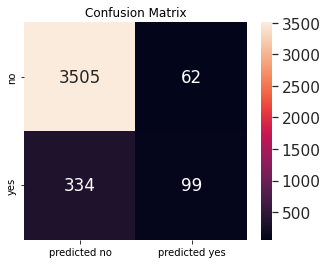

Test Data Accuracy: 0.6056


In [83]:
# importing confusion matrix and roc_auc_score from sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# importing seaborn for plotting the heatmap
import seaborn as sn

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = ('no', 'yes'), columns = ('predicted no',
                                                           'predicted yes'))
plt.figure(figsize = (5,4))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
plt.show()
print("Test Data Accuracy: %0.4f" % roc_auc_score(y_test, y_pred))

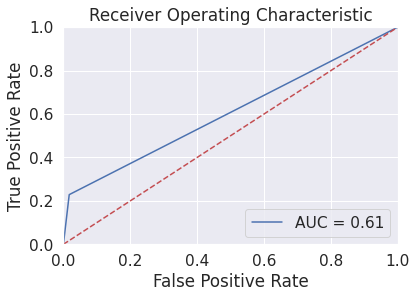

In [84]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Area under ROC curve is 61  which very minimum when compare al the three models built and has the best predicting efficiency compared to all 3 built above

# Conclusion

So as goal to predict the subscription of the customer for term depoti in the bank we have practide the models wit feeded inputs and trained it , as we have test the data on that we an observer among logistic regression, Random forest and ANN,Random forest over the smapled data performs well as F1 score is 94 and ROC , AUC curve is 76. and ANN IS ROC IS 61 which is best of all 3.
so we can explore more by using hyperparameter tuning methood , on above executed algorithims and also by wisely using the duration of the call by converting them in tminutes and categoring them in to binary values. which wil result more accurate prediction of subscribing customers 